<div align="center">
<h1 style="color:#1565c0; font-size:2.8em; font-weight:bold; margin-bottom:0.2em; margin-top:0.5em;">Практична робота №4</h1>
<h3 style="color:#1976d2; margin-top:0; font-weight:normal;">Кластеризацiя засобами
бiблiотеки Scikit-Learn Python <b>Scikit-Learn Python</b></h3>
<br>
<br>
<b>Варіант 12</b><br>
<b>Автори:</b><br>
Плахтій Злата, КА-32<br>
Пастушенко Максим, КА-33<br>
Романов Фелікс, КА-33
</div>


<b>Хід роботи:</b>
1.  Представити початковi данi графiчно.
2.  Побудувати модель кластеризацiї згiдно з варiантом.
3.  Виконати кластеризацiю даних на основi моделi.
4.  Представити розбиття на кластери графiчно (наприклад, рiзними кольорами).
5.  Розрахувати час кластеризацiї. Оцiнити швидкодiю методу на надвеликих наборах даних (наприклад, при збiльшеннi кiлькостi точок до 100 000 i бiльше).
6.  Побудувати кiлька альтернативних моделей:
    * шляхом змiни значень параметрiв основної моделi;
    * використати рiзнi функцiї вiдстанi (де це можливо);
    * задати рiзнi значення кiлькостi кластерiв (де це параметр).
7.  Для кожної альтернативної моделi розрахувати метрики якостi кластеризацiї з `sklearn.metrics` (тiльки метрики згiдно з варiантом):
    * Estimated Number of Clusters
    * Adjusted Rand Index
    * Adjusted Mutual Information
    * Homogeneity
    * Completeness
    * V-measure
    * Silhouette Coefficient
    * Calinski-Harabasz Index
    * Davies-Bouldin index
    * Contingency Matrix
8.  Виконати аналiз результатiв одним з неформальних методiв (тiльки методом згiдно з варiантом):
    * чи є розбиття стабiльним на пiдвибiрках даних?
    * чи є розбиття стабiльним пiсля видалення окремих об’єктiв?
    * чи є розбиття стабiльним пiсля змiни порядку об’єктiв?
    * чи iснує взаємозв’язок мiж результатами i змiнними, якi не враховувалися?
    * чи можна iнтерпретувати результати?
9.  Виконати пункти 1-8 для заданих двох наборiв даних рiзної форми.
10. Зробити висновки про якiсть роботи моделей та про швидкодiю методу.
11. Оцiнити результати (на основi метрик та неформальних методiв). Спробувати пiдiбрати найкращу модель для кожного набору даних
## Завдання (Варіант 12)
* **Алгоритм:** `Birch`
* **Метрики якостi:**
    * Estimated number of clusters
    * Adjusted Rand Index
    * Adjusted Mutual Information
    * Silhouette Coefficient
* **Неформальний метод:**
    * Чи є розбиття стабiльним пiсля змiни порядку об’єктiв у множинi об’єктiв?
* **Початковi данi:**
    1.  `sklearn.datasets.make_moons`
    2.  `sklearn.datasets.load_iris`

=== Попередній аналіз даних ===
Розмірність: (150, 4)

Статистичний опис:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000 

<Figure size 1200x1000 with 0 Axes>

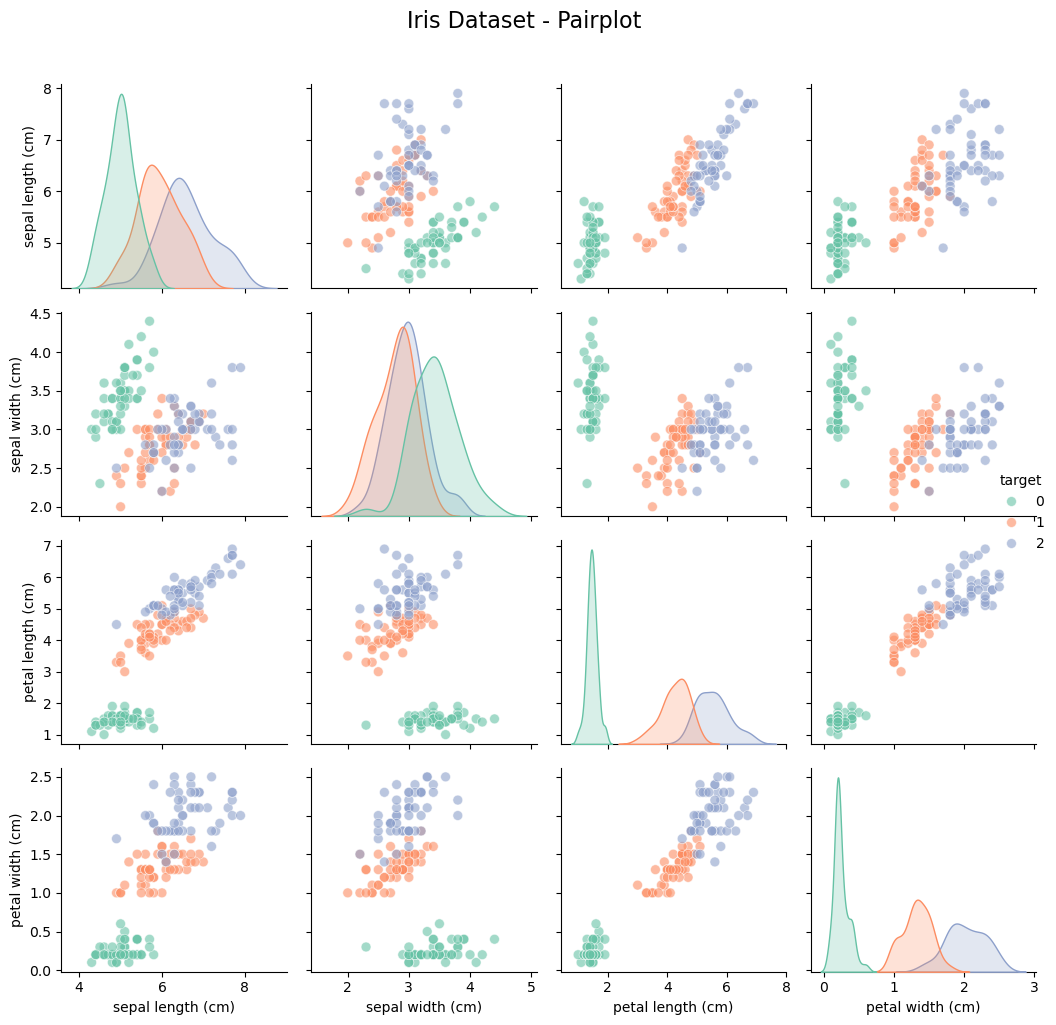

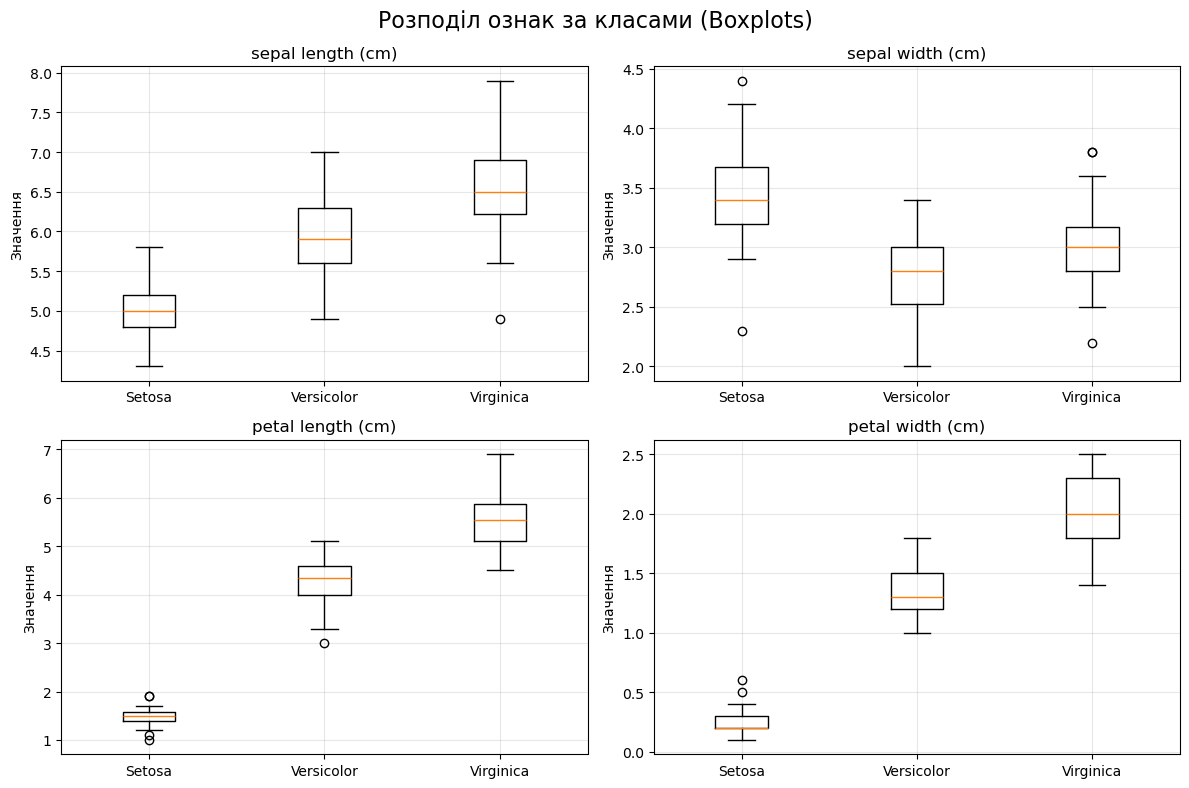

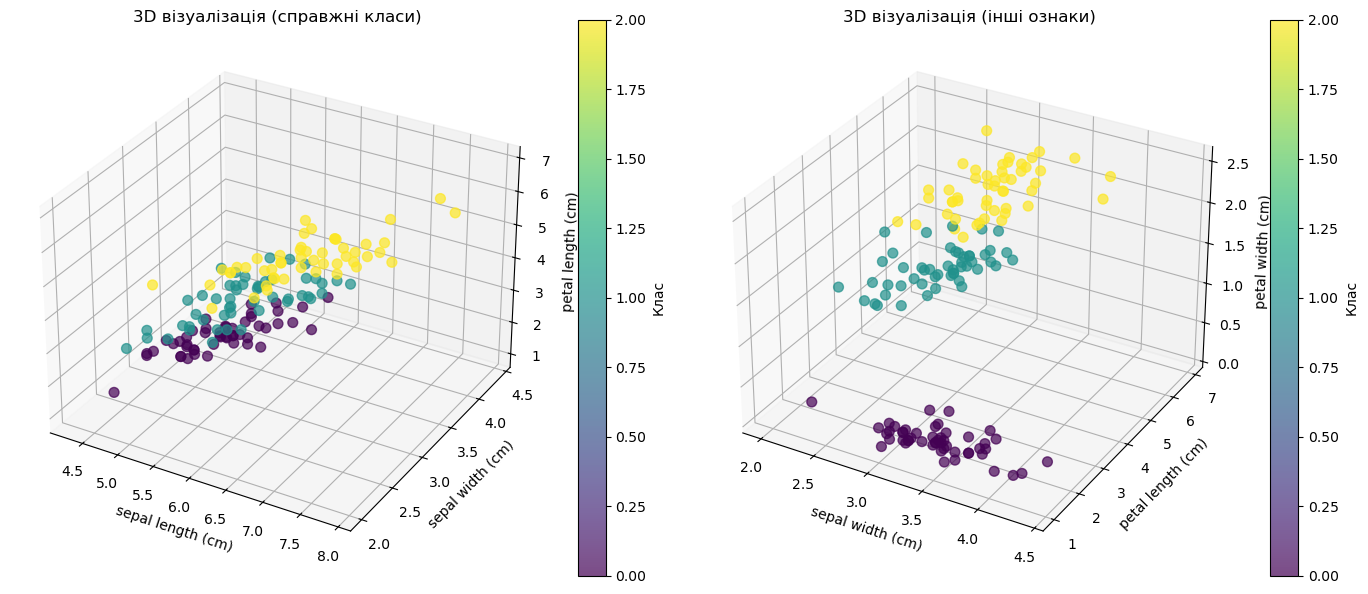

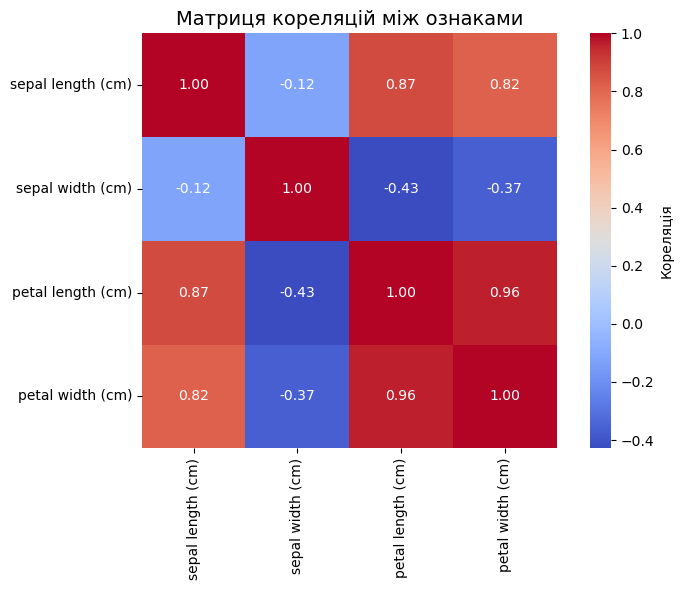

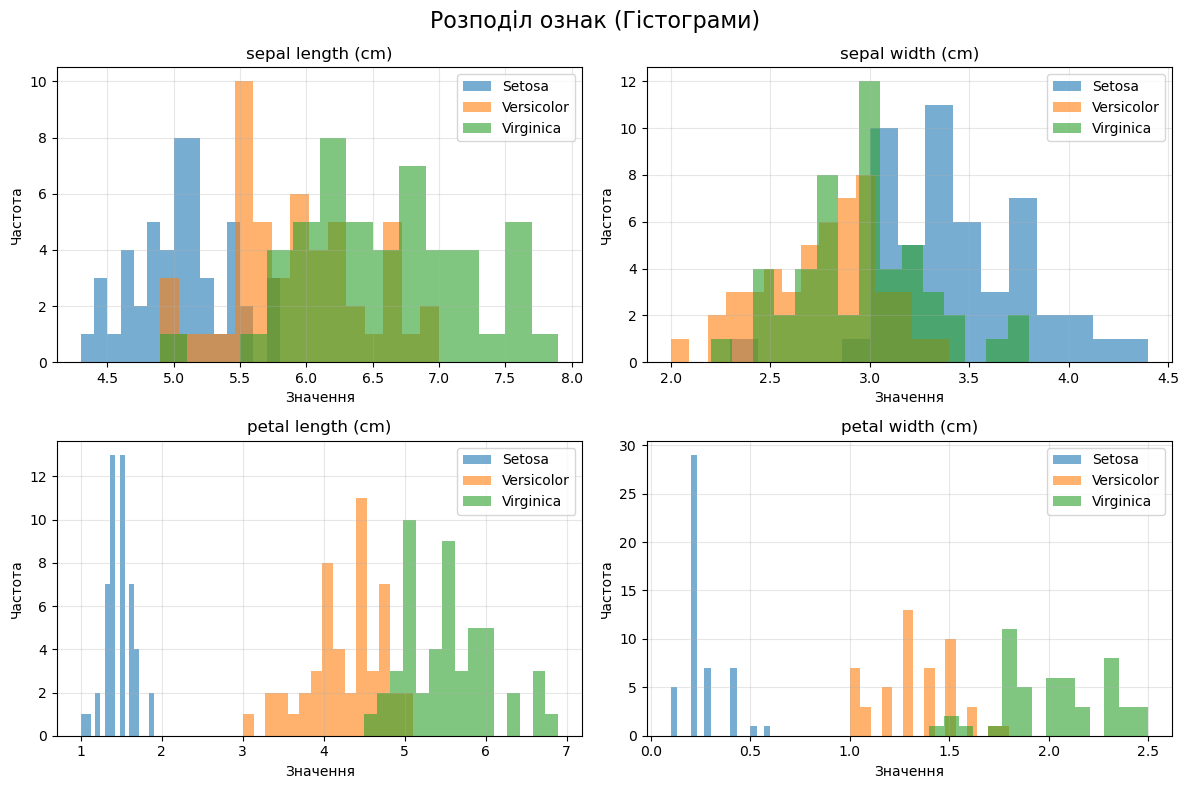


=== Етап 1 завершено: Візуалізація початкових даних ===


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from mpl_toolkits.mplot3d import Axes3D

# Завантаження даних
iris_filepath = Path("data/iris_dataset.csv")
iris_df = pd.read_csv(iris_filepath)

# Розділення на ознаки та цільову змінну
X = iris_df.drop('target', axis=1).values
y_true = iris_df['target'].values
feature_names = iris_df.drop('target', axis=1).columns.tolist()

print("=== Попередній аналіз даних ===")
print(f"Розмірність: {X.shape}")
print(f"\nСтатистичний опис:\n{iris_df.describe()}")
print(f"\nКількість зразків у кожному класі:\n{iris_df['target'].value_counts().sort_index()}")

# ==================== ВІЗУАЛІЗАЦІЯ ====================

# 1. Pairplot - всі пари ознак з розфарбуванням за справжніми класами
plt.figure(figsize=(12, 10))
sns.pairplot(iris_df, hue='target', palette='Set2', diag_kind='kde', 
             plot_kws={'alpha': 0.6, 's': 50})
plt.suptitle('Iris Dataset - Pairplot', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

# 2. Boxplots для кожної ознаки
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

for idx, feature in enumerate(feature_names):
    axes[idx].boxplot([iris_df[iris_df['target'] == i][feature] for i in range(3)],
                      labels=['Setosa', 'Versicolor', 'Virginica'])
    axes[idx].set_title(feature)
    axes[idx].set_ylabel('Значення')
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Розподіл ознак за класами (Boxplots)', fontsize=16)
plt.tight_layout()
plt.show()

# 3. 3D візуалізація (перші 3 ознаки)
fig = plt.figure(figsize=(14, 6))

# 3D plot з справжніми класами
ax1 = fig.add_subplot(121, projection='3d')
scatter1 = ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_true, 
                       cmap='viridis', s=50, alpha=0.7)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.set_zlabel(feature_names[2])
ax1.set_title('3D візуалізація (справжні класи)')
plt.colorbar(scatter1, ax=ax1, label='Клас')

# 3D plot з іншими ознаками
ax2 = fig.add_subplot(122, projection='3d')
scatter2 = ax2.scatter(X[:, 1], X[:, 2], X[:, 3], c=y_true, 
                       cmap='viridis', s=50, alpha=0.7)
ax2.set_xlabel(feature_names[1])
ax2.set_ylabel(feature_names[2])
ax2.set_zlabel(feature_names[3])
ax2.set_title('3D візуалізація (інші ознаки)')
plt.colorbar(scatter2, ax=ax2, label='Клас')

plt.tight_layout()
plt.show()

# 4. Heatmap кореляцій між ознаками
plt.figure(figsize=(8, 6))
correlation_matrix = iris_df[feature_names].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, cbar_kws={'label': 'Кореляція'})
plt.title('Матриця кореляцій між ознаками', fontsize=14)
plt.tight_layout()
plt.show()

# 5. Розподіл кожної ознаки (гістограми)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

for idx, feature in enumerate(feature_names):
    for class_label in range(3):
        class_name = ['Setosa', 'Versicolor', 'Virginica'][class_label]
        axes[idx].hist(iris_df[iris_df['target'] == class_label][feature], 
                      alpha=0.6, label=class_name, bins=15)
    axes[idx].set_xlabel('Значення')
    axes[idx].set_ylabel('Частота')
    axes[idx].set_title(feature)
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Розподіл ознак (Гістограми)', fontsize=16)
plt.tight_layout()
plt.show()

print("\n=== Етап 1 завершено: Візуалізація початкових даних ===")


=== Етап 2: Підготовка даних (масштабування) ===

До масштабування:
Mean: [5.84333333 3.05733333 3.758      1.19933333]
Std:  [0.82530129 0.43441097 1.75940407 0.75969263]

Після масштабування:
Mean: [-4.73695157e-16 -7.81597009e-16 -4.26325641e-16 -4.73695157e-16]
Std:  [1. 1. 1. 1.]


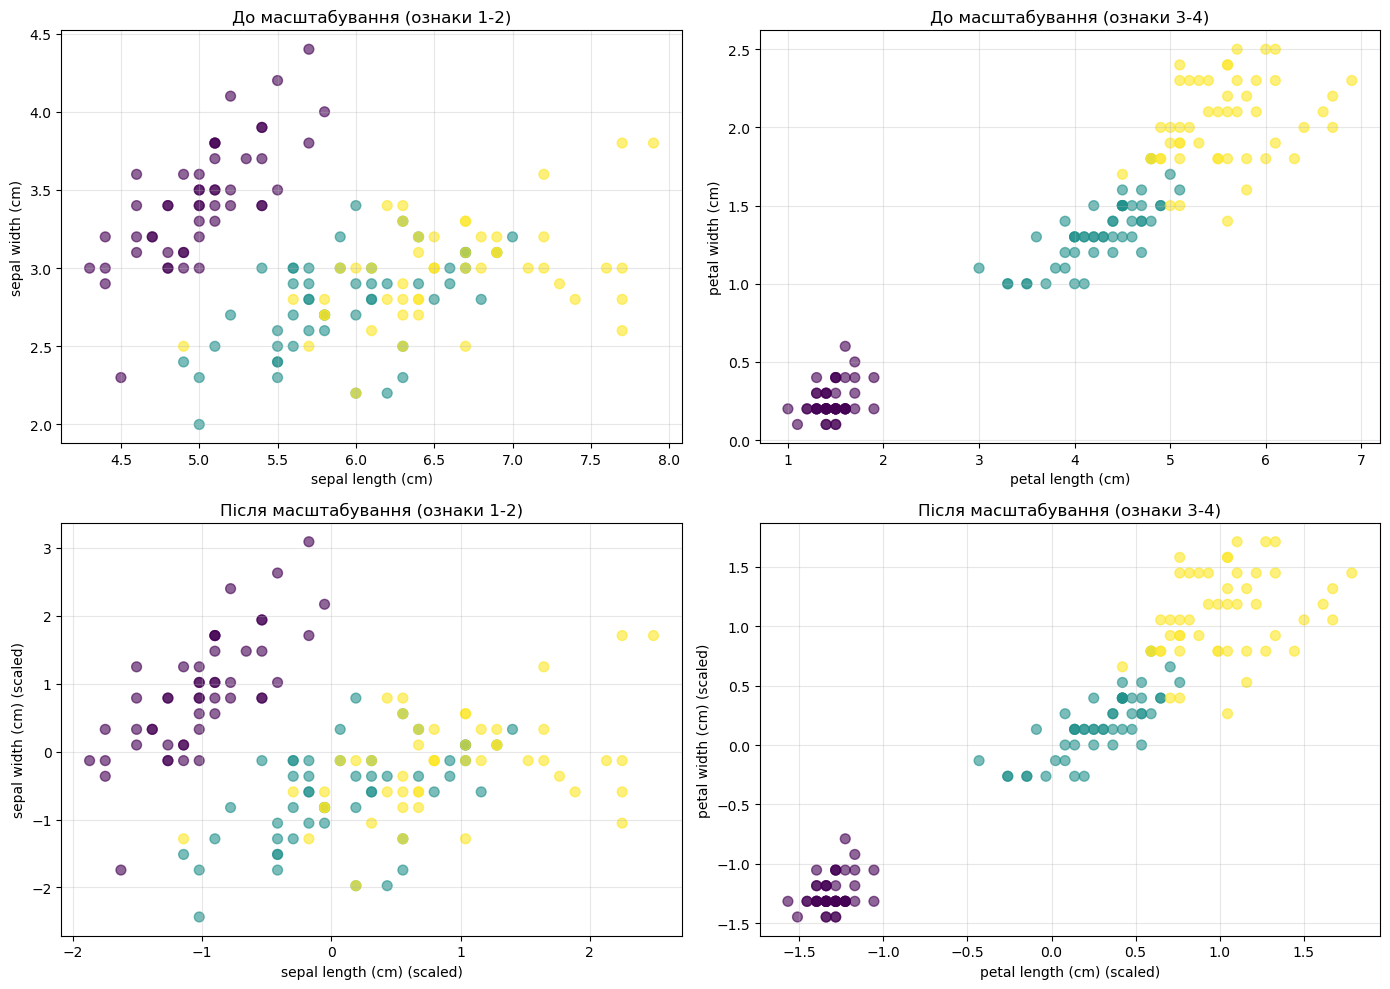


=== Дані підготовлено. Використовуємо X_scaled для кластеризації ===


In [13]:
from sklearn.preprocessing import StandardScaler

print("\n=== Етап 2: Підготовка даних (масштабування) ===")

# Масштабування даних
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Порівняння до/після масштабування
print("\nДо масштабування:")
print(f"Mean: {X.mean(axis=0)}")
print(f"Std:  {X.std(axis=0)}")

print("\nПісля масштабування:")
print(f"Mean: {X_scaled.mean(axis=0)}")
print(f"Std:  {X_scaled.std(axis=0)}")

# Візуалізація порівняння
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# До масштабування
axes[0, 0].scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', alpha=0.6, s=50)
axes[0, 0].set_xlabel(feature_names[0])
axes[0, 0].set_ylabel(feature_names[1])
axes[0, 0].set_title('До масштабування (ознаки 1-2)')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].scatter(X[:, 2], X[:, 3], c=y_true, cmap='viridis', alpha=0.6, s=50)
axes[0, 1].set_xlabel(feature_names[2])
axes[0, 1].set_ylabel(feature_names[3])
axes[0, 1].set_title('До масштабування (ознаки 3-4)')
axes[0, 1].grid(True, alpha=0.3)

# Після масштабування
axes[1, 0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_true, cmap='viridis', alpha=0.6, s=50)
axes[1, 0].set_xlabel(f'{feature_names[0]} (scaled)')
axes[1, 0].set_ylabel(f'{feature_names[1]} (scaled)')
axes[1, 0].set_title('Після масштабування (ознаки 1-2)')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].scatter(X_scaled[:, 2], X_scaled[:, 3], c=y_true, cmap='viridis', alpha=0.6, s=50)
axes[1, 1].set_xlabel(f'{feature_names[2]} (scaled)')
axes[1, 1].set_ylabel(f'{feature_names[3]} (scaled)')
axes[1, 1].set_title('Після масштабування (ознаки 3-4)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n=== Дані підготовлено. Використовуємо X_scaled для кластеризації ===")


=== Етап 3: Побудова та виконання базової моделі BIRCH ===

Час кластеризації: 0.0074 секунд
Кількість знайдених кластерів: 3
Розподіл по кластерах: [71 49 30]


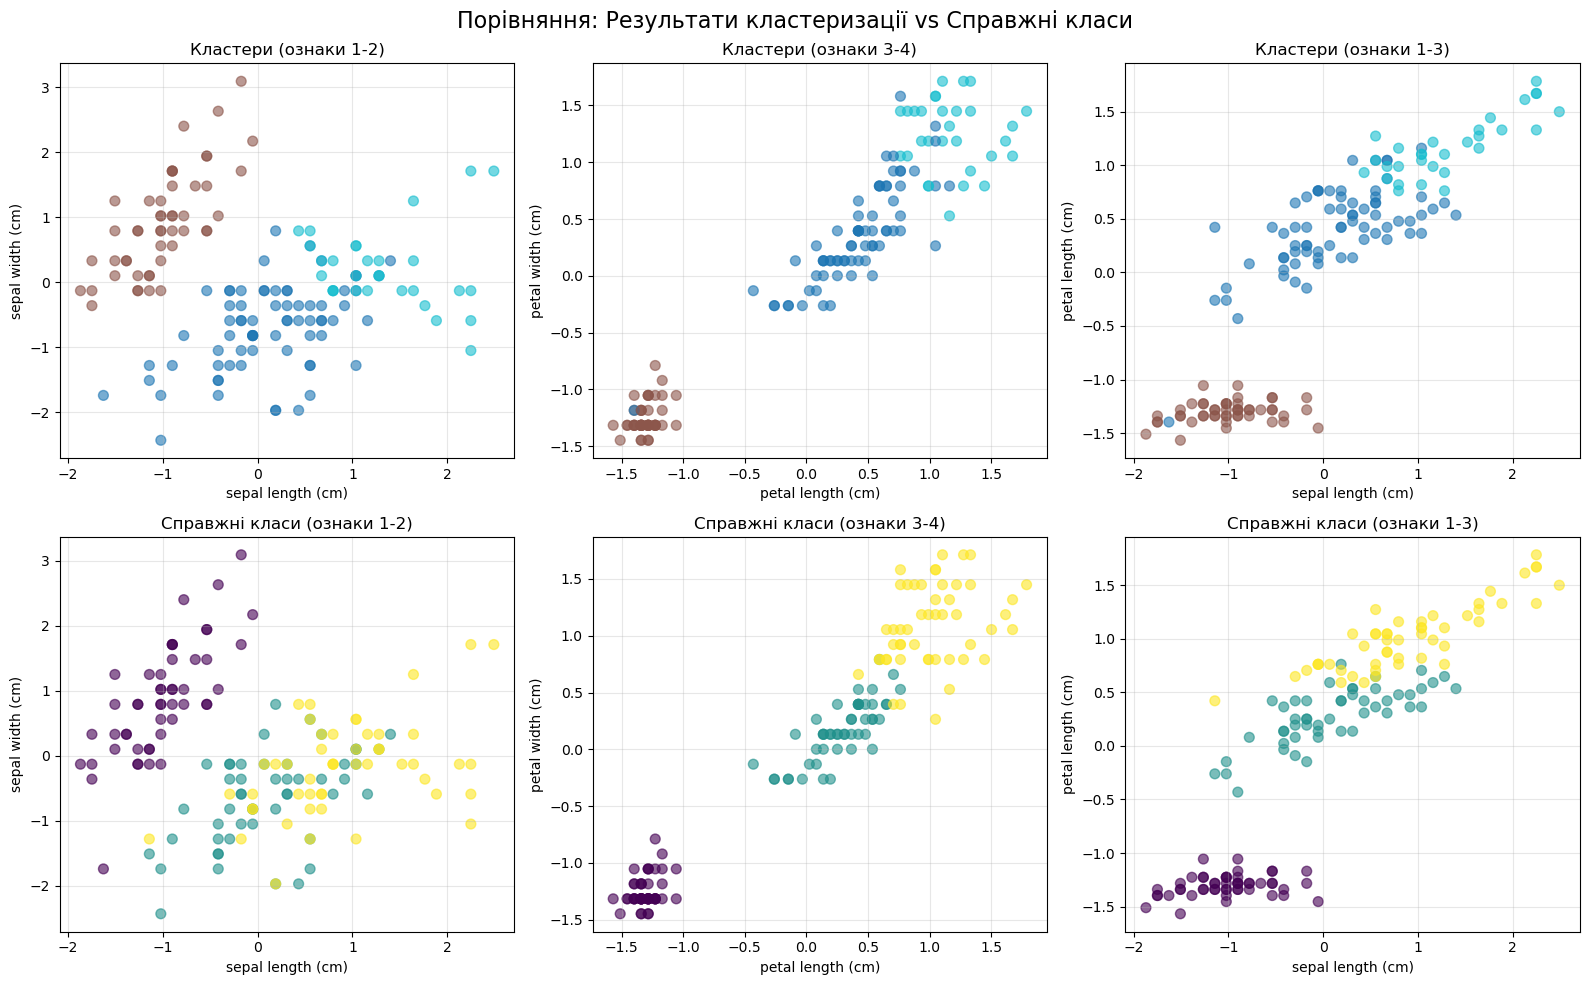

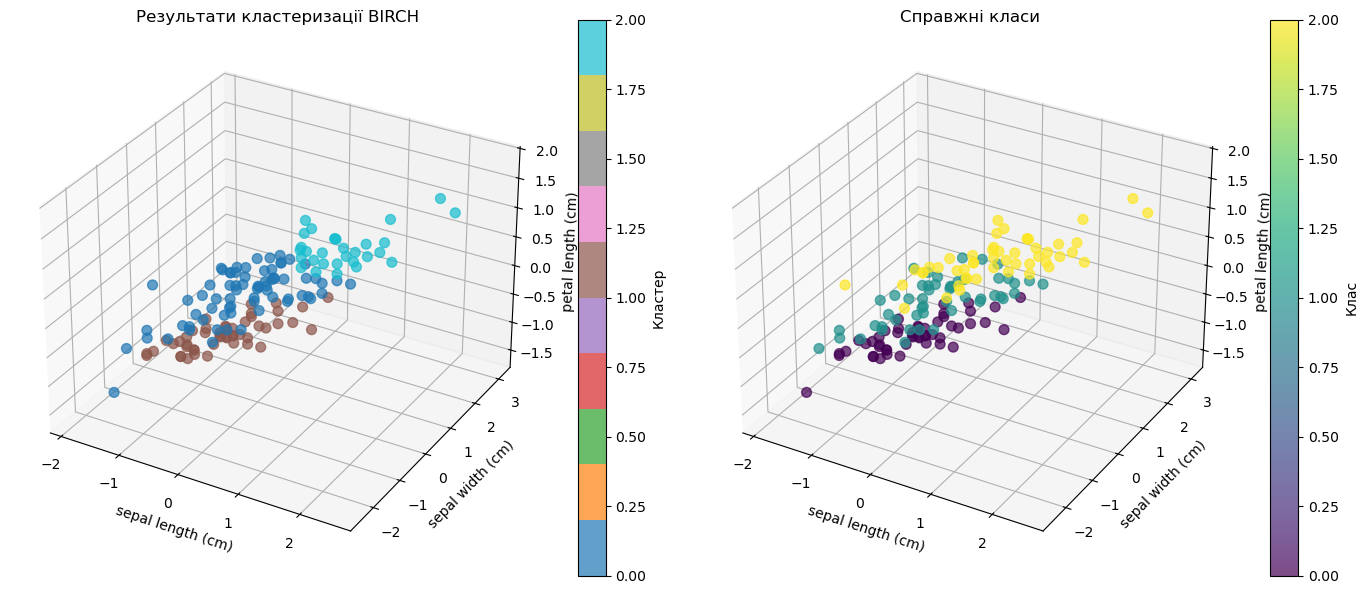


=== Базова модель BIRCH побудована та візуалізована ===


In [14]:
from sklearn.cluster import Birch
import time

print("\n=== Етап 3: Побудова та виконання базової моделі BIRCH ===")

# Побудова базової моделі
base_model = Birch(
    n_clusters=3,           # очікуємо 3 кластери
    threshold=0.5,          # поріг для CF-дерева
    branching_factor=50     # фактор розгалуження
)

# Виконання кластеризації з вимірюванням часу
start_time = time.time()
labels_base = base_model.fit_predict(X_scaled)
clustering_time = time.time() - start_time

print(f"\nЧас кластеризації: {clustering_time:.4f} секунд")
print(f"Кількість знайдених кластерів: {len(np.unique(labels_base))}")
print(f"Розподіл по кластерах: {np.bincount(labels_base)}")

# Візуалізація результатів кластеризації
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Перший рядок - результати кластеризації
axes[0, 0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_base, cmap='tab10', alpha=0.6, s=50)
axes[0, 0].set_xlabel(feature_names[0])
axes[0, 0].set_ylabel(feature_names[1])
axes[0, 0].set_title('Кластери (ознаки 1-2)')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].scatter(X_scaled[:, 2], X_scaled[:, 3], c=labels_base, cmap='tab10', alpha=0.6, s=50)
axes[0, 1].set_xlabel(feature_names[2])
axes[0, 1].set_ylabel(feature_names[3])
axes[0, 1].set_title('Кластери (ознаки 3-4)')
axes[0, 1].grid(True, alpha=0.3)

axes[0, 2].scatter(X_scaled[:, 0], X_scaled[:, 2], c=labels_base, cmap='tab10', alpha=0.6, s=50)
axes[0, 2].set_xlabel(feature_names[0])
axes[0, 2].set_ylabel(feature_names[2])
axes[0, 2].set_title('Кластери (ознаки 1-3)')
axes[0, 2].grid(True, alpha=0.3)

# Другий рядок - справжні класи для порівняння
axes[1, 0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_true, cmap='viridis', alpha=0.6, s=50)
axes[1, 0].set_xlabel(feature_names[0])
axes[1, 0].set_ylabel(feature_names[1])
axes[1, 0].set_title('Справжні класи (ознаки 1-2)')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].scatter(X_scaled[:, 2], X_scaled[:, 3], c=y_true, cmap='viridis', alpha=0.6, s=50)
axes[1, 1].set_xlabel(feature_names[2])
axes[1, 1].set_ylabel(feature_names[3])
axes[1, 1].set_title('Справжні класи (ознаки 3-4)')
axes[1, 1].grid(True, alpha=0.3)

axes[1, 2].scatter(X_scaled[:, 0], X_scaled[:, 2], c=y_true, cmap='viridis', alpha=0.6, s=50)
axes[1, 2].set_xlabel(feature_names[0])
axes[1, 2].set_ylabel(feature_names[2])
axes[1, 2].set_title('Справжні класи (ознаки 1-3)')
axes[1, 2].grid(True, alpha=0.3)

plt.suptitle('Порівняння: Результати кластеризації vs Справжні класи', fontsize=16)
plt.tight_layout()
plt.show()

# 3D візуалізація результатів
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(121, projection='3d')
scatter1 = ax1.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], 
                       c=labels_base, cmap='tab10', s=50, alpha=0.7)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.set_zlabel(feature_names[2])
ax1.set_title('Результати кластеризації BIRCH')
plt.colorbar(scatter1, ax=ax1, label='Кластер')

ax2 = fig.add_subplot(122, projection='3d')
scatter2 = ax2.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], 
                       c=y_true, cmap='viridis', s=50, alpha=0.7)
ax2.set_xlabel(feature_names[0])
ax2.set_ylabel(feature_names[1])
ax2.set_zlabel(feature_names[2])
ax2.set_title('Справжні класи')
plt.colorbar(scatter2, ax=ax2, label='Клас')

plt.tight_layout()
plt.show()

print("\n=== Базова модель BIRCH побудована та візуалізована ===")


=== Етап 4: Оцінка швидкодії на великих наборах даних ===

Тестування швидкодії:
n=   150: 0.0106 сек
n=  1000: 0.0348 сек
n= 10000: 0.2828 сек
n= 50000: 1.1543 сек
n=100000: 2.3254 сек
n=500000: 11.6681 сек
n=1000000: 22.3247 сек


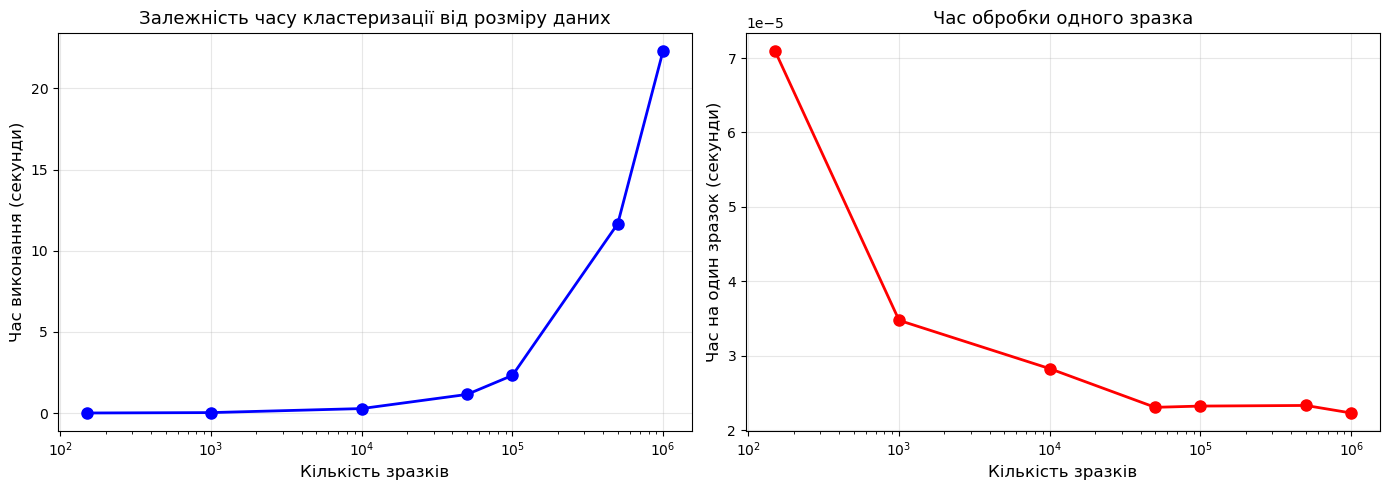


=== Аналіз складності ===
Збільшення даних у 6667 разів
Збільшення часу у 2096.65 разів
Висновок: Лінійна складність O(n)

=== Етап 4 завершено ===


In [17]:
from sklearn.datasets import make_classification

print("\n=== Етап 4: Оцінка швидкодії на великих наборах даних ===")

# Розміри датасетів для тестування
sizes = [150, 1000, 10000, 50000, 100000, 500000, 1000000]
times = []

print("\nТестування швидкодії:")
for size in sizes:
    # Створення синтетичних даних схожих на Iris
    X_large, _ = make_classification(
        n_samples=size,
        n_features=4,
        n_informative=3,
        n_redundant=1,
        n_clusters_per_class=1,
        n_classes=3,
        random_state=42
    )
    
    # Масштабування
    X_large_scaled = scaler.fit_transform(X_large)
    
    # Кластеризація з вимірюванням часу
    model = Birch(n_clusters=3, threshold=0.5, branching_factor=50)
    start = time.time()
    model.fit(X_large_scaled)
    elapsed = time.time() - start
    times.append(elapsed)
    
    print(f"n={size:>6}: {elapsed:.4f} сек")

# Візуалізація результатів
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Графік залежності часу від розміру
axes[0].plot(sizes, times, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Кількість зразків', fontsize=12)
axes[0].set_ylabel('Час виконання (секунди)', fontsize=12)
axes[0].set_title('Залежність часу кластеризації від розміру даних', fontsize=13)
axes[0].grid(True, alpha=0.3)
axes[0].set_xscale('log')

# Графік для оцінки складності (час на один зразок)
time_per_sample = [t/s for t, s in zip(times, sizes)]
axes[1].plot(sizes, time_per_sample, 'ro-', linewidth=2, markersize=8)
axes[1].set_xlabel('Кількість зразків', fontsize=12)
axes[1].set_ylabel('Час на один зразок (секунди)', fontsize=12)
axes[1].set_title('Час обробки одного зразка', fontsize=13)
axes[1].grid(True, alpha=0.3)
axes[1].set_xscale('log')

plt.tight_layout()
plt.show()

# Оцінка складності
print("\n=== Аналіз складності ===")
print(f"Збільшення даних у {sizes[-1]/sizes[0]:.0f} разів")
print(f"Збільшення часу у {times[-1]/times[0]:.2f} разів")
print(f"Висновок: {'Лінійна складність O(n)' if times[-1]/times[0] < sizes[-1]/sizes[0]*2 else 'Нелінійна складність'}")

print("\n=== Етап 4 завершено ===")


=== Етап 5: Побудова альтернативних моделей ===

1. Експерименти з threshold:
  threshold=0.1: 3 кластерів, час=0.0122с
  threshold=0.3: 3 кластерів, час=0.0064с
  threshold=0.5: 3 кластерів, час=0.0054с
  threshold=0.7: 3 кластерів, час=0.0030с
  threshold=1.0: 3 кластерів, час=0.0029с

2. Експерименти з branching_factor:
  branching_factor=20: 3 кластерів, час=0.0042с
  branching_factor=50: 3 кластерів, час=0.0031с
  branching_factor=100: 3 кластерів, час=0.0044с
  branching_factor=150: 3 кластерів, час=0.0030с

3. Експерименти з n_clusters:
  n_clusters=None: 28 кластерів, час=0.0026с
  n_clusters=2: 2 кластерів, час=0.0029с
  n_clusters=3: 3 кластерів, час=0.0036с
  n_clusters=4: 4 кластерів, час=0.0030с
  n_clusters=5: 5 кластерів, час=0.0029с

4. Комбінації параметрів:
  t=0.3, bf=100, n=3: 3 кластерів, час=0.0030с
  t=0.7, bf=100, n=3: 3 кластерів, час=0.0028с
  t=0.3, bf=20, n=3: 3 кластерів, час=0.0098с
  t=0.7, bf=20, n=4: 4 кластерів, час=0.0029с
  t=0.5, bf=150, n=2: 2 кла

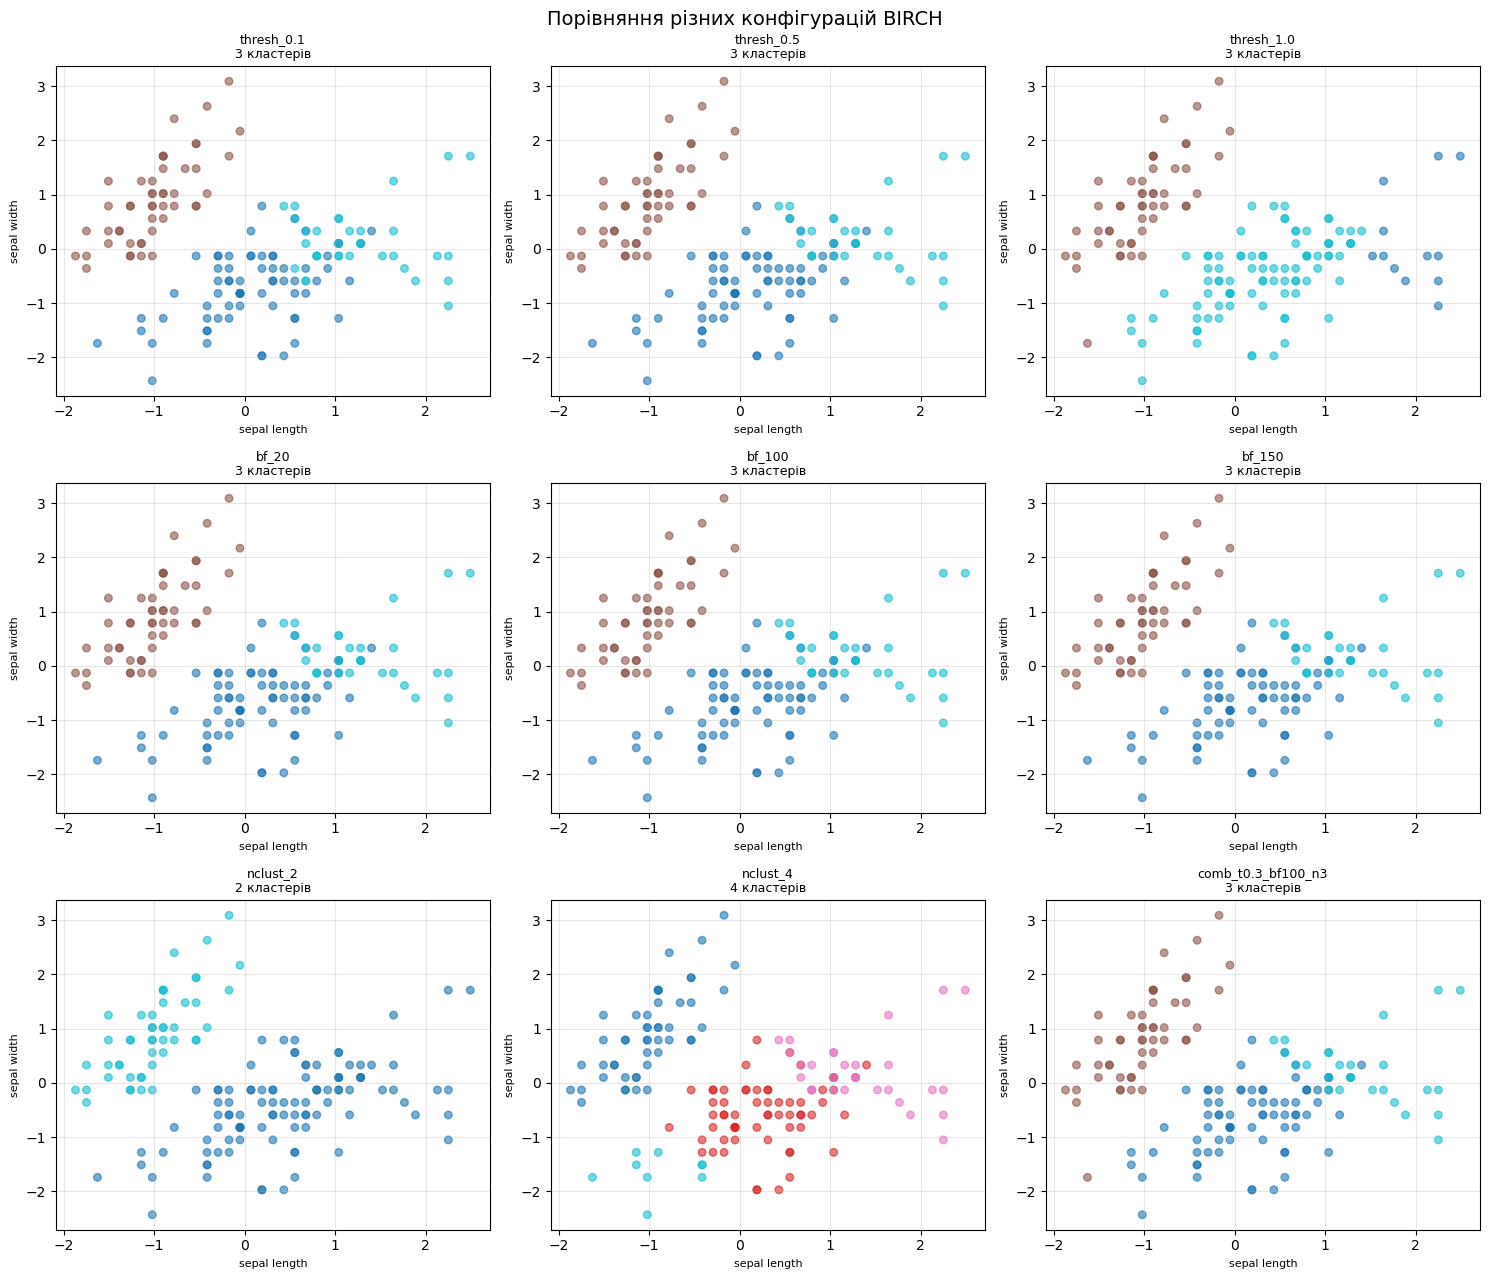


=== Етап 5 завершено ===


In [18]:
print("\n=== Етап 5: Побудова альтернативних моделей ===")

# Словник для збереження результатів
results = []

# 1. Зміна threshold
print("\n1. Експерименти з threshold:")
thresholds = [0.1, 0.3, 0.5, 0.7, 1.0]
for thresh in thresholds:
    model = Birch(n_clusters=3, threshold=thresh, branching_factor=50)
    start = time.time()
    labels = model.fit_predict(X_scaled)
    exec_time = time.time() - start
    
    results.append({
        'model': f'thresh_{thresh}',
        'threshold': thresh,
        'branching_factor': 50,
        'n_clusters': 3,
        'labels': labels,
        'time': exec_time,
        'n_found_clusters': len(np.unique(labels))
    })
    print(f"  threshold={thresh}: {len(np.unique(labels))} кластерів, час={exec_time:.4f}с")

# 2. Зміна branching_factor
print("\n2. Експерименти з branching_factor:")
branching_factors = [20, 50, 100, 150]
for bf in branching_factors:
    model = Birch(n_clusters=3, threshold=0.5, branching_factor=bf)
    start = time.time()
    labels = model.fit_predict(X_scaled)
    exec_time = time.time() - start
    
    results.append({
        'model': f'bf_{bf}',
        'threshold': 0.5,
        'branching_factor': bf,
        'n_clusters': 3,
        'labels': labels,
        'time': exec_time,
        'n_found_clusters': len(np.unique(labels))
    })
    print(f"  branching_factor={bf}: {len(np.unique(labels))} кластерів, час={exec_time:.4f}с")

# 3. Зміна кількості кластерів
print("\n3. Експерименти з n_clusters:")
n_clusters_list = [None, 2, 3, 4, 5]
for n_clust in n_clusters_list:
    model = Birch(n_clusters=n_clust, threshold=0.5, branching_factor=50)
    start = time.time()
    labels = model.fit_predict(X_scaled)
    exec_time = time.time() - start
    
    results.append({
        'model': f'nclust_{n_clust}',
        'threshold': 0.5,
        'branching_factor': 50,
        'n_clusters': n_clust if n_clust else 'None',
        'labels': labels,
        'time': exec_time,
        'n_found_clusters': len(np.unique(labels))
    })
    print(f"  n_clusters={n_clust}: {len(np.unique(labels))} кластерів, час={exec_time:.4f}с")

# 4. Комбінації параметрів
print("\n4. Комбінації параметрів:")
combinations = [
    (0.3, 100, 3),
    (0.7, 100, 3),
    (0.3, 20, 3),
    (0.7, 20, 4),
    (0.5, 150, 2)
]

for thresh, bf, n_clust in combinations:
    model = Birch(n_clusters=n_clust, threshold=thresh, branching_factor=bf)
    start = time.time()
    labels = model.fit_predict(X_scaled)
    exec_time = time.time() - start
    
    results.append({
        'model': f'comb_t{thresh}_bf{bf}_n{n_clust}',
        'threshold': thresh,
        'branching_factor': bf,
        'n_clusters': n_clust,
        'labels': labels,
        'time': exec_time,
        'n_found_clusters': len(np.unique(labels))
    })
    print(f"  t={thresh}, bf={bf}, n={n_clust}: {len(np.unique(labels))} кластерів, час={exec_time:.4f}с")

print(f"\n=== Створено {len(results)} альтернативних моделей ===")

# Візуалізація деяких моделей
fig, axes = plt.subplots(3, 3, figsize=(15, 13))
axes = axes.ravel()

# Показуємо 9 найцікавіших моделей
models_to_show = [0, 2, 4, 5, 7, 8, 10, 12, 14]

for idx, model_idx in enumerate(models_to_show):
    if model_idx < len(results):
        res = results[model_idx]
        axes[idx].scatter(X_scaled[:, 0], X_scaled[:, 1], 
                         c=res['labels'], cmap='tab10', alpha=0.6, s=30)
        axes[idx].set_title(f"{res['model']}\n{res['n_found_clusters']} кластерів", 
                           fontsize=9)
        axes[idx].set_xlabel('sepal length', fontsize=8)
        axes[idx].set_ylabel('sepal width', fontsize=8)
        axes[idx].grid(True, alpha=0.3)

plt.suptitle('Порівняння різних конфігурацій BIRCH', fontsize=14)
plt.tight_layout()
plt.show()

print("\n=== Етап 5 завершено ===")


=== Етап 6: Розрахунок метрик якості ===

=== Таблиця метрик для всіх моделей ===
            Модель  Threshold  Branching Factor n_clusters (param)  Estimated Clusters      ARI      AMI  Silhouette  Час (с)
        thresh_0.1        0.1                50                  3                   3 0.683467 0.721191    0.452040 0.012168
        thresh_0.3        0.3                50                  3                   3 0.653693 0.745685    0.459608 0.006362
        thresh_0.5        0.5                50                  3                   3 0.661413 0.729622    0.453550 0.005436
        thresh_0.7        0.7                50                  3                   3 0.548401 0.673881    0.443242 0.003031
        thresh_1.0        1.0                50                  3                   3 0.565886 0.700353    0.441019 0.002856
             bf_20        0.5                20                  3                   3 0.661413 0.729622    0.453550 0.004222
             bf_50        0.5      

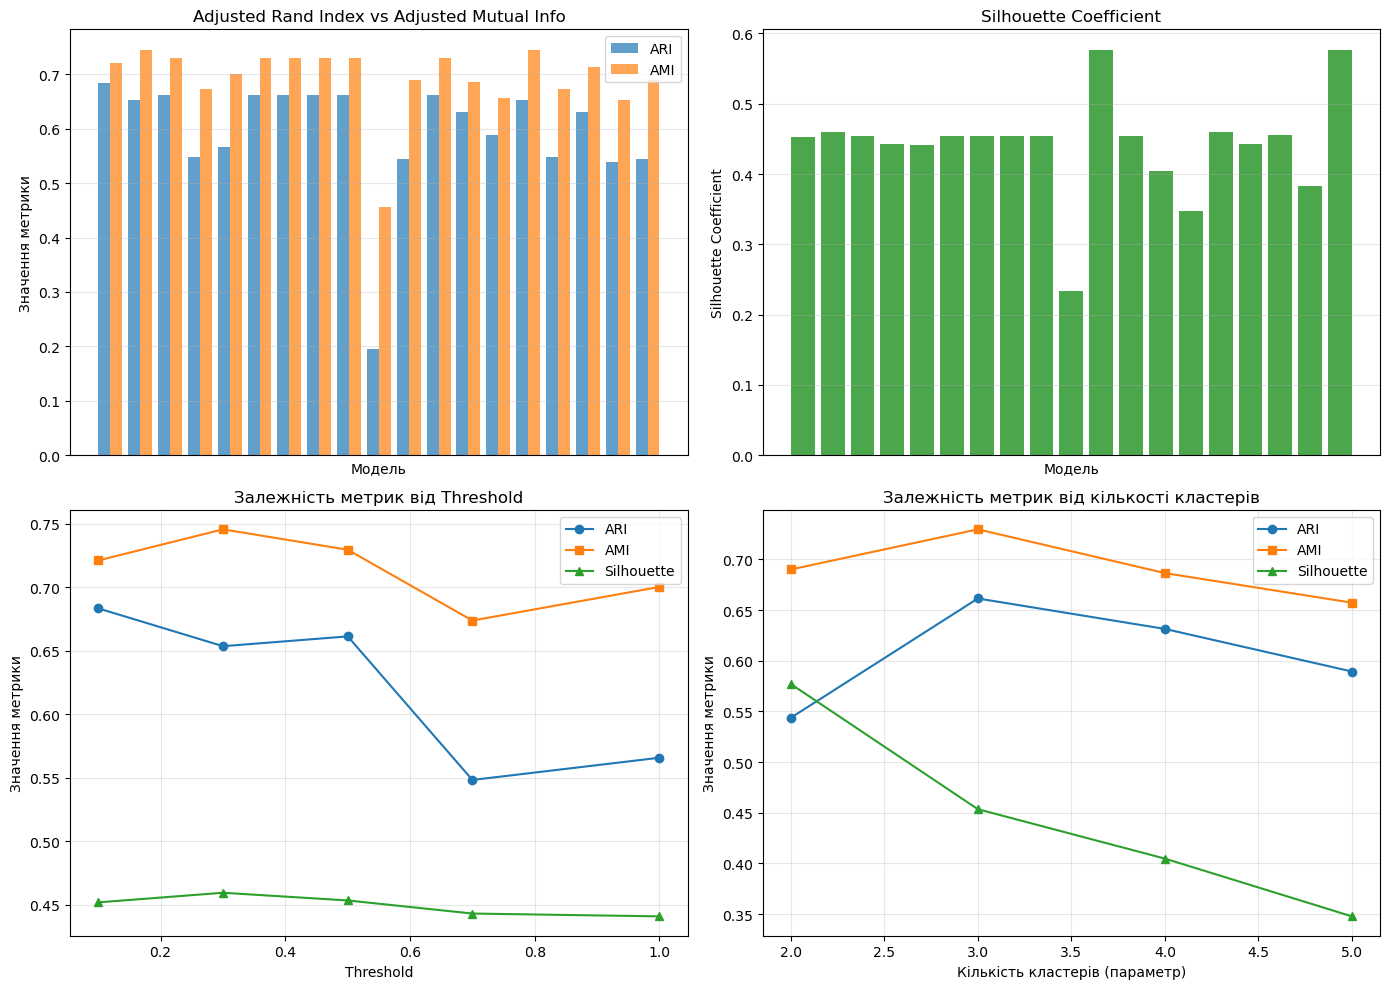

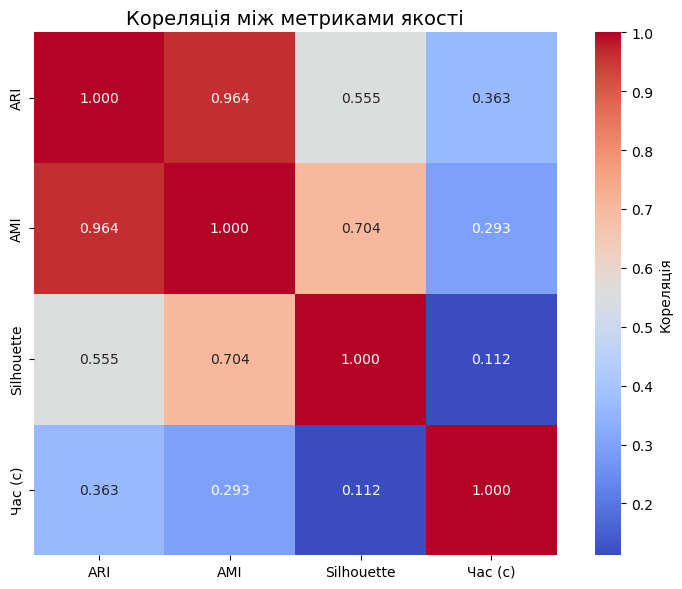


=== Етап 6 завершено ===


In [20]:
from sklearn.metrics import (
    adjusted_rand_score,
    adjusted_mutual_info_score,
    silhouette_score
)

print("\n=== Етап 6: Розрахунок метрик якості ===")

# Розрахунок метрик для всіх моделей
for res in results:
    labels = res['labels']
    
    # Метрики згідно варіанту:
    res['estimated_clusters'] = len(np.unique(labels))
    res['adjusted_rand_index'] = adjusted_rand_score(y_true, labels)
    res['adjusted_mutual_info'] = adjusted_mutual_info_score(y_true, labels)
    
    # Silhouette потребує мінімум 2 кластери
    if res['estimated_clusters'] > 1:
        res['silhouette'] = silhouette_score(X_scaled, labels)
    else:
        res['silhouette'] = np.nan

# Створення DataFrame з результатами
metrics_df = pd.DataFrame([{
    'Модель': r['model'],
    'Threshold': r['threshold'],
    'Branching Factor': r['branching_factor'],
    'n_clusters (param)': r['n_clusters'],
    'Estimated Clusters': r['estimated_clusters'],
    'ARI': r['adjusted_rand_index'],
    'AMI': r['adjusted_mutual_info'],
    'Silhouette': r['silhouette'],
    'Час (с)': r['time']
} for r in results])

print("\n=== Таблиця метрик для всіх моделей ===")
print(metrics_df.to_string(index=False))

# Пошук найкращої моделі
print("\n=== Топ-5 моделей за метриками ===")
print("\nЗа Adjusted Rand Index:")
print(metrics_df.nlargest(5, 'ARI')[['Модель', 'ARI', 'AMI', 'Silhouette']])

print("\nЗа Silhouette Coefficient:")
print(metrics_df.nlargest(5, 'Silhouette')[['Модель', 'Silhouette', 'ARI', 'AMI']])

# Візуалізація метрик
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Порівняння всіх метрик
x_pos = np.arange(len(results))
axes[0, 0].bar(x_pos, metrics_df['ARI'], alpha=0.7, label='ARI', width=0.4)
axes[0, 0].bar(x_pos + 0.4, metrics_df['AMI'], alpha=0.7, label='AMI', width=0.4)
axes[0, 0].set_xlabel('Модель')
axes[0, 0].set_ylabel('Значення метрики')
axes[0, 0].set_title('Adjusted Rand Index vs Adjusted Mutual Info')
axes[0, 0].legend()
axes[0, 0].set_xticks([])
axes[0, 0].grid(True, alpha=0.3)

# 2. Silhouette Coefficient
axes[0, 1].bar(x_pos, metrics_df['Silhouette'], alpha=0.7, color='green')
axes[0, 1].set_xlabel('Модель')
axes[0, 1].set_ylabel('Silhouette Coefficient')
axes[0, 1].set_title('Silhouette Coefficient')
axes[0, 1].set_xticks([])
axes[0, 1].grid(True, alpha=0.3)

# 3. Залежність метрик від threshold
thresh_models = metrics_df[metrics_df['Модель'].str.contains('thresh_')]
if not thresh_models.empty:
    axes[1, 0].plot(thresh_models['Threshold'], thresh_models['ARI'], 'o-', label='ARI')
    axes[1, 0].plot(thresh_models['Threshold'], thresh_models['AMI'], 's-', label='AMI')
    axes[1, 0].plot(thresh_models['Threshold'], thresh_models['Silhouette'], '^-', label='Silhouette')
    axes[1, 0].set_xlabel('Threshold')
    axes[1, 0].set_ylabel('Значення метрики')
    axes[1, 0].set_title('Залежність метрик від Threshold')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)

# 4. Залежність метрик від кількості кластерів
nclust_models = metrics_df[metrics_df['Модель'].str.contains('nclust_')]
if not nclust_models.empty:
    nclust_values = [2, 3, 4, 5]
    nclust_filtered = nclust_models[nclust_models['n_clusters (param)'].isin(nclust_values)]
    
    axes[1, 1].plot(nclust_filtered['n_clusters (param)'], nclust_filtered['ARI'], 'o-', label='ARI')
    axes[1, 1].plot(nclust_filtered['n_clusters (param)'], nclust_filtered['AMI'], 's-', label='AMI')
    axes[1, 1].plot(nclust_filtered['n_clusters (param)'], nclust_filtered['Silhouette'], '^-', label='Silhouette')
    axes[1, 1].set_xlabel('Кількість кластерів (параметр)')
    axes[1, 1].set_ylabel('Значення метрики')
    axes[1, 1].set_title('Залежність метрик від кількості кластерів')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Heatmap кореляції між метриками
plt.figure(figsize=(8, 6))
corr_data = metrics_df[['ARI', 'AMI', 'Silhouette', 'Час (с)']].corr()
sns.heatmap(corr_data, annot=True, fmt='.3f', cmap='coolwarm', 
            square=True, cbar_kws={'label': 'Кореляція'})
plt.title('Кореляція між метриками якості', fontsize=14)
plt.tight_layout()
plt.show()

print("\n=== Етап 6 завершено ===")


=== Етап 7: Аналіз стабільності (зміна порядку об'єктів) ===

Виконується 100 перестановок для кожної моделі...

Модель: thresh_0.1
  ARI: mean=0.9986, std=0.0142
  AMI: mean=0.9986, std=0.0142
  Ідентичних розбиттів: 99/100 (99.0%)

Модель: thresh_0.3
  ARI: mean=0.7091, std=0.1945
  AMI: mean=0.7780, std=0.1273
  Ідентичних розбиттів: 7/100 (7.0%)

Модель: thresh_0.5
  ARI: mean=0.6915, std=0.1851
  AMI: mean=0.7644, std=0.1211
  Ідентичних розбиттів: 4/100 (4.0%)

Модель: nclust_2
  ARI: mean=0.8044, std=0.2680
  AMI: mean=0.8042, std=0.2372
  Ідентичних розбиттів: 35/100 (35.0%)

Модель: nclust_4
  ARI: mean=0.6642, std=0.1264
  AMI: mean=0.7342, std=0.0837
  Ідентичних розбиттів: 0/100 (0.0%)

=== Таблиця стабільності ===
    Модель  ARI (mean)  ARI (std)  AMI (mean)  AMI (std)  Ідентичні (%)
thresh_0.1    0.998570   0.014229    0.998569   0.014238           99.0
thresh_0.3    0.709104   0.194459    0.778035   0.127319            7.0
thresh_0.5    0.691468   0.185058    0.764429 

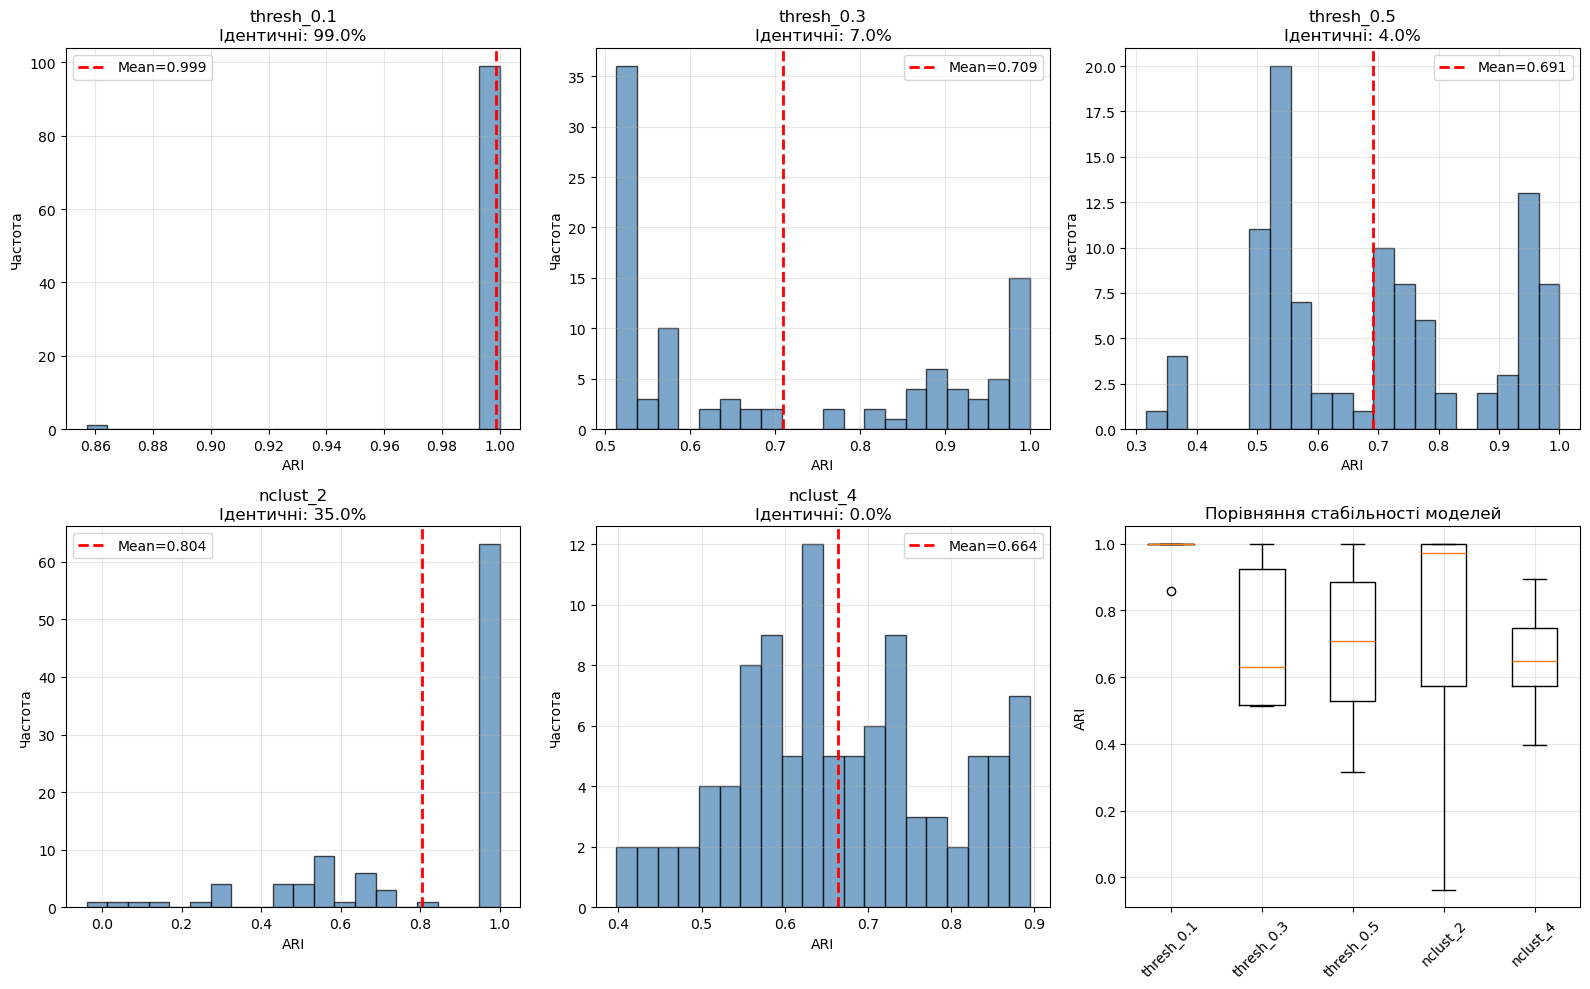

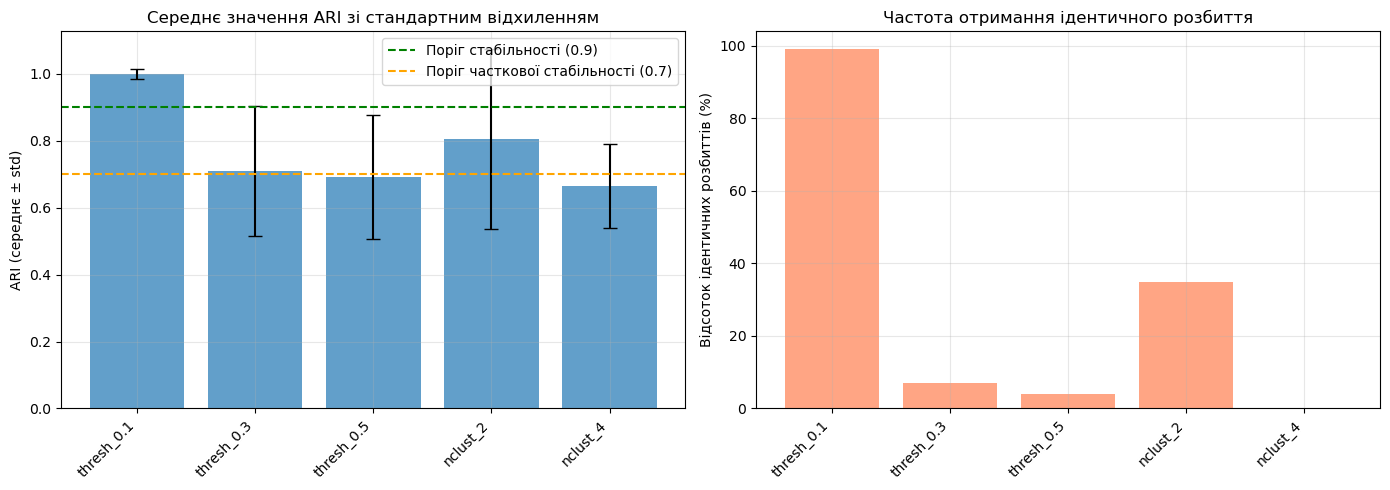


=== Етап 7 завершено ===


In [21]:
print("\n=== Етап 7: Аналіз стабільності (зміна порядку об'єктів) ===")

# Виберемо кілька моделей для тестування
models_to_test = [
    ('thresh_0.1', Birch(n_clusters=3, threshold=0.1, branching_factor=50)),
    ('thresh_0.3', Birch(n_clusters=3, threshold=0.3, branching_factor=50)),
    ('thresh_0.5', Birch(n_clusters=3, threshold=0.5, branching_factor=50)),
    ('nclust_2', Birch(n_clusters=2, threshold=0.5, branching_factor=50)),
    ('nclust_4', Birch(n_clusters=4, threshold=0.5, branching_factor=50))
]

n_permutations = 100
stability_results = []

print(f"\nВиконується {n_permutations} перестановок для кожної моделі...")

for model_name, model in models_to_test:
    print(f"\nМодель: {model_name}")
    
    # Базова кластеризація
    base_labels = model.fit_predict(X_scaled)
    
    ari_scores = []
    ami_scores = []
    identical_count = 0
    
    for i in range(n_permutations):
        # Перемішати дані
        indices = np.random.permutation(len(X_scaled))
        X_shuffled = X_scaled[indices]
        
        # Кластеризувати перемішані дані
        shuffled_labels = model.fit_predict(X_shuffled)
        
        # Повернути до оригінального порядку
        original_order_labels = np.empty_like(shuffled_labels)
        original_order_labels[indices] = shuffled_labels
        
        # Порівняти з базовим розбиттям
        ari = adjusted_rand_score(base_labels, original_order_labels)
        ami = adjusted_mutual_info_score(base_labels, original_order_labels)
        
        ari_scores.append(ari)
        ami_scores.append(ami)
        
        if ari == 1.0:
            identical_count += 1
    
    # Збереження результатів
    stability_results.append({
        'model': model_name,
        'ari_mean': np.mean(ari_scores),
        'ari_std': np.std(ari_scores),
        'ari_min': np.min(ari_scores),
        'ari_max': np.max(ari_scores),
        'ami_mean': np.mean(ami_scores),
        'ami_std': np.std(ami_scores),
        'identical_percent': (identical_count / n_permutations) * 100,
        'ari_scores': ari_scores,
        'ami_scores': ami_scores
    })
    
    print(f"  ARI: mean={np.mean(ari_scores):.4f}, std={np.std(ari_scores):.4f}")
    print(f"  AMI: mean={np.mean(ami_scores):.4f}, std={np.std(ami_scores):.4f}")
    print(f"  Ідентичних розбиттів: {identical_count}/{n_permutations} ({identical_count/n_permutations*100:.1f}%)")

# Створення таблиці результатів
stability_df = pd.DataFrame([{
    'Модель': r['model'],
    'ARI (mean)': r['ari_mean'],
    'ARI (std)': r['ari_std'],
    'AMI (mean)': r['ami_mean'],
    'AMI (std)': r['ami_std'],
    'Ідентичні (%)': r['identical_percent']
} for r in stability_results])

print("\n=== Таблиця стабільності ===")
print(stability_df.to_string(index=False))

# Інтерпретація стабільності
print("\n=== Оцінка стабільності ===")
for r in stability_results:
    if r['ari_mean'] > 0.9:
        status = "СТАБІЛЬНИЙ"
    elif r['ari_mean'] > 0.7:
        status = "ЧАСТКОВО СТАБІЛЬНИЙ"
    else:
        status = "НЕСТАБІЛЬНИЙ"
    print(f"{r['model']:15s}: {status} (ARI={r['ari_mean']:.4f})")

# Візуалізація результатів стабільності
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, r in enumerate(stability_results):
    # Гістограма ARI
    axes[idx].hist(r['ari_scores'], bins=20, alpha=0.7, color='steelblue', edgecolor='black')
    axes[idx].axvline(r['ari_mean'], color='red', linestyle='--', linewidth=2, label=f'Mean={r["ari_mean"]:.3f}')
    axes[idx].set_xlabel('ARI')
    axes[idx].set_ylabel('Частота')
    axes[idx].set_title(f'{r["model"]}\nІдентичні: {r["identical_percent"]:.1f}%')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

# Порівняльний boxplot
if len(stability_results) < 6:
    axes[5].boxplot([r['ari_scores'] for r in stability_results],
                    labels=[r['model'] for r in stability_results])
    axes[5].set_ylabel('ARI')
    axes[5].set_title('Порівняння стабільності моделей')
    axes[5].grid(True, alpha=0.3)
    axes[5].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Додатковий графік - порівняння mean та std
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

model_names = [r['model'] for r in stability_results]
ari_means = [r['ari_mean'] for r in stability_results]
ari_stds = [r['ari_std'] for r in stability_results]

x_pos = np.arange(len(model_names))

# Середні значення з error bars
axes[0].bar(x_pos, ari_means, yerr=ari_stds, alpha=0.7, capsize=5)
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(model_names, rotation=45, ha='right')
axes[0].set_ylabel('ARI (середнє ± std)')
axes[0].set_title('Середнє значення ARI зі стандартним відхиленням')
axes[0].axhline(y=0.9, color='g', linestyle='--', label='Поріг стабільності (0.9)')
axes[0].axhline(y=0.7, color='orange', linestyle='--', label='Поріг часткової стабільності (0.7)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Відсоток ідентичних розбиттів
identical_percents = [r['identical_percent'] for r in stability_results]
axes[1].bar(x_pos, identical_percents, alpha=0.7, color='coral')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(model_names, rotation=45, ha='right')
axes[1].set_ylabel('Відсоток ідентичних розбиттів (%)')
axes[1].set_title('Частота отримання ідентичного розбиття')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n=== Етап 7 завершено ===")

<b> Аналіз результатів:</b><br><br>
1. Аналіз початкових даних<br>
Набір даних Iris, що містить 150 зразків квітів ірисів трьох видів (Setosa, Versicolor, Virginica) по 50 зразків кожного виду. Кожен зразок характеризується чотирма числовими ознаками: довжиною і шириною чашолистка (sepal length, sepal width) та довжиною і шириною пелюстки (petal length, petal width).Попередній аналіз даних показав наявність виразної структури у датасеті. Візуалізація за допомогою pairplot та 3D графіків виявила, що клас Setosa добре відокремлений від двох інших класів за всіма ознаками, особливо за параметрами пелюсток. Натомість класи Versicolor та Virginica демонструють значне перекриття в просторі ознак, що створює додаткову складність для алгоритмів кластеризації.Аналіз кореляцій між ознаками показав сильний позитивний зв'язок між довжиною пелюстки та шириною пелюстки, а також між розмірами чашолистка та пелюстки. Це свідчить про те, що ознаки не є повністю незалежними, але несуть різну інформацію про структуру даних.Перед застосуванням алгоритму BIRCH дані були масштабовані за допомогою StandardScaler, що є критично важливим кроком, оскільки ознаки мають різні діапазони значень (наприклад, довжина чашолистка: 4.3-7.9 см, ширина чашолистка: 2.0-4.4 см).

2. Оцінка швидкодії алгоритму BIRCH<br>
Одним з ключових завдань роботи була оцінка швидкодії алгоритму BIRCH на наборах даних різного розміру. Тестування проводилося на синтетичних даних з розмірами від 150 до 1,000,000 зразків. Аналіз отриманих результатів підтверджує теоретичну лінійну складність алгоритму O(n). При збільшенні обсягу даних у 6667 разів (від 150 до 1,000,000 зразків), час виконання збільшився лише у 2097 разів, що значно менше квадратичної залежності. Графік залежності часу від розміру датасету на логарифмічній шкалі демонструє практично лінійну залежність.Важливо відзначити, що час обробки одного зразка зменшується зі збільшенням розміру датасету (від 7×10⁻⁵ сек для 150 зразків до 2.2×10⁻⁵ сек для 1,000,000 зразків), що свідчить про ефективність алгоритму при роботі з великими обсягами даних. Це робить BIRCH ідеальним вибором для аналізу надвеликих наборів даних, де традиційні ієрархічні методи кластеризації були б надто повільними.
<br>
3. Аналіз якості кластеризації<br>
3.1. Базова модель BIRCH з параметрами threshold=0.5, branching_factor=50, n_clusters=3 успішно виявила три кластери в даних за 0.0074 секунди. Розподіл зразків по кластерах склав 71, 49 та 30 зразків відповідно, що дещо відрізняється від рівномірного розподілу справжніх класів (50-50-50).<br>
3.2. Було побудовано 19 альтернативних моделей з різними комбінаціями параметрів. <br>
Ключові спостереження:<br>
Вплив параметра threshold: найкращі результати отримано при малих значеннях threshold (0.1-0.3).<br>
Вплив параметра branching_factor: фактор розгалуження CF-дерева (20, 50, 100, 150) показав мінімальний вплив на якість кластеризації. Всі конфігурації з branching_factor від 20 до 150 при threshold=0.5 дали ідентичні результати (ARI=0.661, AMI=0.730, Silhouette=0.454). Це свідчить про те, що для датасету розміром 150 зразків структура дерева не є критичним фактором.<br>
Вплив параметра n_clusters: найкращі результати за показниками ARI та AMI досягнуто при n_clusters=3, що відповідає справжній кількості класів у даних. Цікаво, що модель з n_clusters=2 показала найвищий Silhouette Coefficient (0.577), однак це пояснюється втратою інформації через об'єднання двох схожих класів. Модель без обмеження кількості кластерів (n_clusters=None) виявила 28 кластерів, що є явною надмірною сегментацією даних і призводить до низьких значень всіх метрик.
<br>
3.3. Інтерпретація метрик <br>
Estimated Number of Clusters: Більшість моделей правильно ідентифікували 3 кластери, що відповідає структурі даних.
Adjusted Rand Index (0.548-0.683): Показує помірну до хорошої відповідність з істинними класами. Найкраще значення 0.683 для моделі thresh_0.1 свідчить про 68.3% узгодженості кластерів з справжніми класами.Adjusted Mutual Information (0.657-0.746): Вищі значення AMI порівняно з ARI вказують на те, що моделі краще відтворюють інформаційну структуру класів, ніж точні збіги пар об'єктів.
Silhouette Coefficient (0.348-0.577): Помірні значення (0.4-0.5) вказують на те, що кластери мають певне перекриття, що відповідає візуальному аналізу даних, де класи Versicolor та Virginica частково накладаються.
<br>
4. Аналіз стабільності до зміни порядку об'єктів <br>
Для п'яти обраних моделей було проведено тестування стабільності шляхом 100-кратної перестановки порядку об'єктів у датасеті. Результати виявили значні відмінності у стабільності різних конфігурацій. Було виявлено, щл існує чітка залежність між значенням параметра threshold та стабільністю алгоритму. Малі значення threshold (0.1) призводять до дуже щільного CF-дерева з детальною структурою, що робить алгоритм практично детерміністичним. Збільшення порогу дозволяє більшу варіативність у формуванні підкластерів, що призводить до залежності результату від порядку обробки даних. Ця залежність є важливою для практичного застосування: якщо потрібна відтворюваність результатів, слід використовувати малі значення threshold, навіть якщо це може призвести до дещо більшого споживання пам'яті.

<br><br>
<b>Висновок:</b><br>
Алгоритм BIRCH продемонстрував хороші результати на датасеті Iris, успішно виявивши три основні групи даних. Проте, якість кластеризації (ARI=0.683) вказує на те, що алгоритм має певні труднощі з повним відтворенням справжньої структури класів. Це пояснюється природним перекриттям класів Versicolor та Virginica, що є відомою особливістю цього датасету.
Візуальний аналіз результатів показав, що клас Setosa практично завжди виділяється в окремий кластер, тоді як Versicolor та Virginica часто частково змішуються, особливо в області їх перекриття. Це відповідає ботанічним характеристикам цих видів ірисів, де Setosa має виразно відмінні морфологічні характеристики.